In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import re, string
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
dataframe_o3 = pd.read_csv("../data/raw/ticket-o3.csv", usecols = ['titolo','messaggio','categoria'])
dataframe_gc = pd.read_csv("../data/raw/ticket-gemini-claude.csv", usecols = ['titolo','messaggio','categoria'])

In [3]:
dataframe = pd.concat([dataframe_o3,dataframe_gc])
print(dataframe)

                                                titolo  \
0                                         Login Errore   
1                                Modifica Dati Profilo   
2                            Assistenza Sistema Scuola   
3                      Errore Prenotazione Ricevimento   
4                        Problema Visualizzazione Voti   
..                                                 ...   
445  Informazioni Tasse Scolastiche - Mancanza di C...   
446  Cambio Classe - Richiesta Respinta Senza Motiv...   
447       Documenti Smarriti - Richiesta di Assistenza   
448             Contatto Segreteria - Nessuna Risposta   
449   Problemi di Connessione - Rete Lenta e Instabile   

                                             messaggio   categoria  
0    Buongiorno, sto riscontrando un problema con i...     Accesso  
1    Salve, ho notato che i miei dati di contatto n...     Profilo  
2    Buonasera, utilizzo regolarmente la piattaform...   Didattica  
3    Gentile team, ho prova

In [4]:
x=dataframe['categoria'].value_counts()
print(x)

categoria
Segreteria    866
Didattica     707
Profilo       650
Accesso       634
Tecnico       552
Name: count, dtype: int64


<Axes: xlabel='categoria', ylabel='count'>

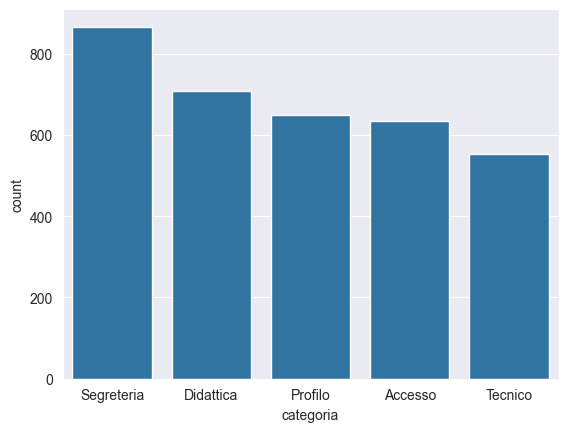

In [5]:
sns.barplot(x)

In [15]:
frame = dataframe['titolo'] + dataframe['messaggio']
print(frame)

0      Login ErroreBuongiorno, sto riscontrando un pr...
1      Modifica Dati ProfiloSalve, ho notato che i mi...
2      Assistenza Sistema ScuolaBuonasera, utilizzo r...
3      Errore Prenotazione RicevimentoGentile team, h...
4      Problema Visualizzazione VotiBuongiorno, duran...
                             ...                        
445    Informazioni Tasse Scolastiche - Mancanza di C...
446    Cambio Classe - Richiesta Respinta Senza Motiv...
447    Documenti Smarriti - Richiesta di AssistenzaHo...
448    Contatto Segreteria - Nessuna RispostaHo prova...
449    Problemi di Connessione - Rete Lenta e Instabi...
Length: 2610, dtype: object


In [16]:
dataframe['titolo_messaggio'] = dataframe['titolo'] + ' ' + dataframe['messaggio']
frame = dataframe[['titolo_messaggio', 'categoria']]
print(frame)

                                         combined_text   categoria
0    Login Errore Buongiorno, sto riscontrando un p...     Accesso
1    Modifica Dati Profilo Salve, ho notato che i m...     Profilo
2    Assistenza Sistema Scuola Buonasera, utilizzo ...   Didattica
3    Errore Prenotazione Ricevimento Gentile team, ...  Segreteria
4    Problema Visualizzazione Voti Buongiorno, dura...   Didattica
..                                                 ...         ...
445  Informazioni Tasse Scolastiche - Mancanza di C...  Segreteria
446  Cambio Classe - Richiesta Respinta Senza Motiv...  Segreteria
447  Documenti Smarriti - Richiesta di Assistenza H...  Segreteria
448  Contatto Segreteria - Nessuna Risposta Ho prov...  Segreteria
449  Problemi di Connessione - Rete Lenta e Instabi...     Tecnico

[2610 rows x 2 columns]


In [ ]:
train_set, test_set = train_test_split(dataframe, random_state=42, test_size=0.2)
print(train_set.shape, test_set.shape)